In [1]:
from tensorflow.keras.layers import Input, Lambda, Flatten, Dense
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
#from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras. preprocessing import image
from tensorflow.keras.preprocessing. image import ImageDataGenerator,load_img ##imageDataGenerator is used for augmenting images
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import numpy as np
from glob import glob
import matplotlib.pyplot as plt


In [2]:
## resize all images to the given below 
Image_Size = [244,244]
train_path = 'data/train'
test_path = 'data/test'

In [3]:
## import the resnet 50 library and add processing layer
## hear I am using image nets weights

resnet = ResNet50(input_shape= Image_Size+[3], weights='imagenet', include_top=False)#input shape is image_size + [3] is because the [3] indicates RGB chanels
# weihts= 'imagenet' because it is the default value, sinc I have 3 output catogeries inlude_top is false    

In [4]:
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 250, 250, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 122, 122, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

 conv5_block3_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block3_2_conv (Conv2D)   (None, 8, 8, 512)    2359808     ['conv5_block3_1_relu[0][0]']    
                                                                                                  
 conv5_block3_2_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block3_2_conv[0][0]']    
 ization)                                                                                         
          

In [5]:
# don't train existing weights,
for layer in resnet.layers:
    layer.trainable =False

In [6]:
#getting number of output classes
folder = glob('data/Train/*')

In [7]:
#flatten the resnet layers
x = Flatten()(resnet.output)

In [8]:
 #dense is used to set length of the folders as output layer 
prediction = Dense(len(folder),activation='softmax')(x)
##create a model object
model = Model(inputs=resnet.input, outputs = prediction)

In [9]:
#view the tructure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 244, 244, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 250, 250, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 122, 122, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv5_block3_2_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_2_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv5_block3_3_conv (Conv2D)   (None, 8, 8, 2048)   1050624     ['conv5_block3_2_relu[0][0]']    
                                                                                                  
 conv5_block3_3_bn (BatchNormal  (None, 8, 8, 2048)  8192        ['conv5_block3_3_conv[0][0]']    
 ization) 

In [10]:
## compile the model and  define the optimizer and loss fiunction
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'],
)

In [11]:
#use the imageDatagenerator to import the images from the dataset and perform data augmentation
train_datagen = ImageDataGenerator(rescale=1./255,# convert the image data pixels to the range between 0 and 1 
                                    shear_range=0.2,# randomly applying shearing transformation by 20%
                                    zoom_range=0.2,# for randomly applying zooming inside picture, zooming the image by 20%
                                    horizontal_flip=True)# for randomly flipping half of the images horizontally
test_datagen = ImageDataGenerator(rescale=1./255)

In [12]:
 ##
training_set = train_datagen.flow_from_directory('data/Train/', 
                                                 target_size= (244,244),
                                                 batch_size=32,
                                                 class_mode='categorical')#since we have over 2 classes

Found 64 images belonging to 3 classes.


In [13]:
test_set = test_datagen.flow_from_directory('data/Test/',
                                            target_size=(244,244),
                                            batch_size= 32,
                                            class_mode='categorical')

Found 58 images belonging to 3 classes.


In [14]:
#fit the model i.r train the model
r = model.fit_generator(
    training_set,
    validation_data=test_set,
    epochs=50,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set),
)


C:\Users\rohit\AppData\Local\Temp\ipykernel_5056\759354938.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
2/2 [==============================] - 19s 10s/step - loss: 8.5408 - accuracy: 0.4531 - val_loss: 29.7635 - val_accuracy: 0.1552
Epoch 2/50
2/2 [==============================] - 11s 8s/step - loss: 28.4789 - accuracy: 0.2812 - val_loss: 13.6981 - val_accuracy: 0.5172
Epoch 3/50
2/2 [==============================] - 11s 8s/step - loss: 13.0708 - accuracy: 0.3438 - val_loss: 10.1602 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 11s 8s/step - loss: 9.0614 - accuracy: 0.3906 - val_loss: 14.2203 - val_accuracy: 0.3276
Epoch 5/50
2/2 [==============================] - 11s 8s/step - loss: 9.1629 - accuracy: 0.3438 - val_loss: 9.5165 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 11s 8s/step - loss: 3.7063 - accuracy: 0.5469 - val_loss: 4.4879 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 11s 8s/step - loss: 5.6034 - accuracy: 0.4219 - val_loss: 3.8557 - val_accuracy: 0.3793
Epoch 8/50
2/2 [===========

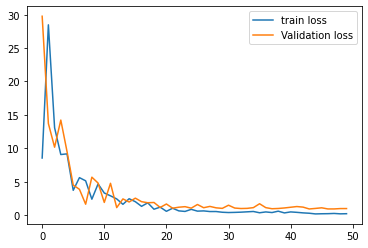

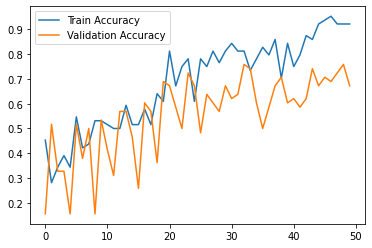

<Figure size 432x288 with 0 Axes>

In [15]:
#plotting the loss function 
plt.plot(r.history['loss'], label= 'train loss')
plt.plot(r.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.show()
plt.savefig("lossVal_Loss")

#plotting Accuracy
plt.plot(r.history['accuracy'], label= "Train Accuracy")
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()
plt.savefig("Accuracy plot")

In [16]:
#save the model as a h5 file 

from tensorflow.keras.models import load_model
model.save('car_brand_resnet50.h5')

C:\Users\rohit\ProgrammingAssignment1\tensorflowenv\lib\site-packages\keras\engine\functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [17]:
y_pred = model.predict(test_set)
y_pred

array([[1.07096121e-01, 7.00361252e-01, 1.92542598e-01],
       [9.97563079e-02, 2.12811101e-02, 8.78962576e-01],
       [7.58355737e-01, 2.30057910e-01, 1.15863942e-02],
       [2.75114775e-01, 2.78899409e-02, 6.96995258e-01],
       [2.41482109e-02, 9.58398283e-01, 1.74535364e-02],
       [5.86523056e-01, 3.88388187e-01, 2.50887722e-02],
       [3.31885293e-02, 2.64957964e-01, 7.01853514e-01],
       [4.46927705e-04, 9.90141213e-01, 9.41192172e-03],
       [1.72711555e-02, 2.80797831e-03, 9.79920924e-01],
       [5.31662285e-01, 1.39956236e-01, 3.28381479e-01],
       [5.21126762e-02, 6.08267605e-01, 3.39619696e-01],
       [6.35532796e-01, 7.58680329e-02, 2.88599193e-01],
       [1.34924166e-02, 4.80274618e-01, 5.06233037e-01],
       [1.74773648e-01, 7.22928703e-01, 1.02297708e-01],
       [2.04514363e-03, 9.97462749e-01, 4.91983083e-04],
       [6.98746357e-04, 9.85470772e-01, 1.38305295e-02],
       [9.72707808e-01, 1.42847672e-02, 1.30074453e-02],
       [1.02935042e-02, 5.80239

In [18]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 2, 0, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 1, 1, 0, 1, 2, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [19]:
 model = load_model('car_brand_resnet50.h5')

In [38]:
img = image.load_img('data/Test/Audi/27.jpg', target_size=(244,244))

In [39]:
x =image.img_to_array(img)


In [40]:
x

array([[[ 69., 102., 137.],
        [ 62.,  95., 130.],
        [ 57.,  85., 124.],
        ...,
        [ 16.,  16.,  28.],
        [ 22.,  22.,  34.],
        [ 22.,  22.,  34.]],

       [[ 70., 102., 140.],
        [ 63.,  95., 133.],
        [ 59.,  87., 126.],
        ...,
        [ 15.,  15.,  27.],
        [ 20.,  20.,  32.],
        [ 19.,  19.,  31.]],

       [[ 70., 102., 140.],
        [ 63.,  95., 133.],
        [ 59.,  87., 126.],
        ...,
        [ 15.,  15.,  27.],
        [ 20.,  20.,  32.],
        [ 19.,  19.,  31.]],

       ...,

       [[165., 192., 219.],
        [168., 195., 222.],
        [172., 199., 226.],
        ...,
        [156., 189., 224.],
        [156., 189., 224.],
        [156., 189., 224.]],

       [[165., 192., 219.],
        [168., 195., 222.],
        [172., 199., 226.],
        ...,
        [156., 189., 224.],
        [156., 189., 224.],
        [156., 189., 224.]],

       [[161., 188., 217.],
        [164., 191., 220.],
        [168., 1

In [41]:
x.shape

(244, 244, 3)

In [42]:
x=x/255 #rescaling the array
x

array([[[0.27058825, 0.4       , 0.5372549 ],
        [0.24313726, 0.37254903, 0.50980395],
        [0.22352941, 0.33333334, 0.4862745 ],
        ...,
        [0.0627451 , 0.0627451 , 0.10980392],
        [0.08627451, 0.08627451, 0.13333334],
        [0.08627451, 0.08627451, 0.13333334]],

       [[0.27450982, 0.4       , 0.54901963],
        [0.24705882, 0.37254903, 0.52156866],
        [0.23137255, 0.34117648, 0.49411765],
        ...,
        [0.05882353, 0.05882353, 0.10588235],
        [0.07843138, 0.07843138, 0.1254902 ],
        [0.07450981, 0.07450981, 0.12156863]],

       [[0.27450982, 0.4       , 0.54901963],
        [0.24705882, 0.37254903, 0.52156866],
        [0.23137255, 0.34117648, 0.49411765],
        ...,
        [0.05882353, 0.05882353, 0.10588235],
        [0.07843138, 0.07843138, 0.1254902 ],
        [0.07450981, 0.07450981, 0.12156863]],

       ...,

       [[0.64705884, 0.7529412 , 0.85882354],
        [0.65882355, 0.7647059 , 0.87058824],
        [0.6745098 , 0

In [43]:
x=np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 244, 244, 3)

In [44]:
model.predict(img_data)

array([[1.2578692e-16, 1.0165032e-12, 1.0000000e+00]], dtype=float32)

In [45]:
a = np.argmax(model.predict(img_data), axis =1)
a

array([2], dtype=int64)